In [54]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

Выбрано: распределение $\arcsin$

In [55]:
arcsin_rv = sts.arcsine()

Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

!Прим.
Для одновременного отображения нескольких графиков в одинаковом масштабе в Pyhton3.0 в функции hist(), вместо normed = True используется выражение density = True.

/home/tater/.local/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:496: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0/np.pi/np.sqrt(x*(1-x))


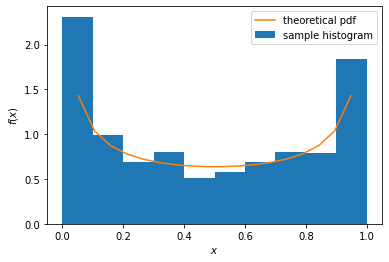

In [56]:
# выборка на 1000 элементов
sample = arcsin_rv.rvs(1000)
# на отрезке [0, 30] рисуется...
x = np.linspace(0,1,20)
# ...гистограмма
pdf = arcsin_rv.pdf(x)
plt.hist(sample,density=True, label='sample histogram')
# ...и pdf
plt.plot(x, pdf, label='theoretical pdf')

plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.
Для распределения $\arcsin$, среднее: $\frac{1}{2}$, дисперсия: $\frac{1}{8}$

Cоответсвенно, $p = N(EX, \frac{DX}{n}) = N(\frac{1}{2}, \sqrt{\frac{1}{8n}})$

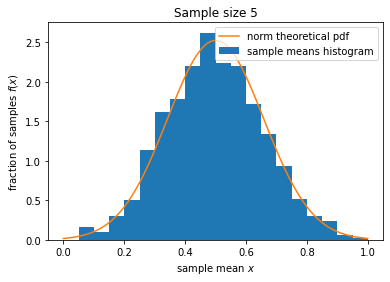

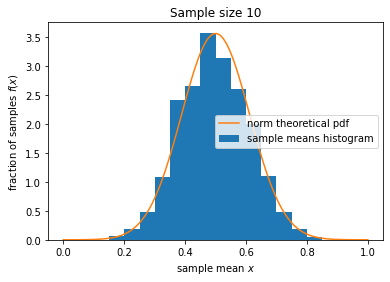

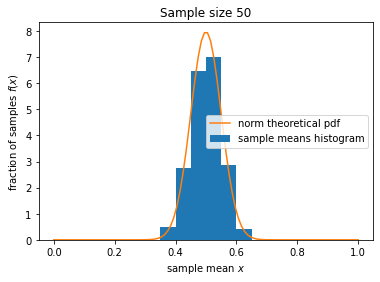

In [60]:
# для выборок размера n
for n in [5, 10, 50]:
    # вычисляется сдеднее из 1000 выборок
    sample_means = []
    for rvn in range(1000):
        sample_means.append(arcsin_rv.rvs(n).mean())
        
    # и вырисовывается на графике
    plt.hist(sample_means, 20, density=True, range=[0, 1], label='sample means histogram')
    # вычисляется pdf нормального распределения с данными параметрами (каждый раз одинаково)
    
    norm_rv = sts.norm(0.5, np.sqrt(1/(8*n)))
    x = np.linspace(0, 1, 100)
    pdf = norm_rv.pdf(x)
    
    # и вырисовывается на графике
    plt.plot(x, pdf, label='norm theoretical pdf')
    
    # легенда графика
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

При увеличении размера выборки n, распределение средних значений начинает сходиться к 6, среднеквадратичное отклонение падает. Т.е. при увеличении n точность апроксимации растет.
При этом расчетное нормальное распределение более менее совпадает с гистограммой, согласно закону больших чисел.